### 케라스로 중간 깊이 신경망 만들기 

In [10]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [11]:
# 데이터 적재 
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# 이미지 벡터 변환 : 28x28  --> 784  
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

# 원래 이미지는 0~255 사이의 정수 --> 0~1 사이의 실수로 정규화 
X_train /= 255
X_valid /= 255

In [12]:
# 0~9로 one-hot encoding 
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [13]:
# 신경망 제작 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile 
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.001), 
              metrics=['accuracy'])

Epoch 1/20


2025-06-15 17:55:42.039470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1369 - loss: 2.3156 - val_accuracy: 0.3214 - val_loss: 2.0053
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2857 - loss: 2.0148 - val_accuracy: 0.5063 - val_loss: 1.7546
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4203 - loss: 1.7819 - val_accuracy: 0.6091 - val_loss: 1.5377
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5104 - loss: 1.5903 - val_accuracy: 0.6710 - val_loss: 1.3536
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5737 - loss: 1.4187 - val_accuracy: 0.7094 - val_loss: 1.2023
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6176 - loss: 1.2878 - val_accuracy: 0.7406 - val_loss: 1.0790
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6485 - loss: 1.1809 - val_accuracy: 0.7618 - val_loss: 0.9796
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6786 - loss: 1.0858 - val_accuracy: 0.7768 - val_

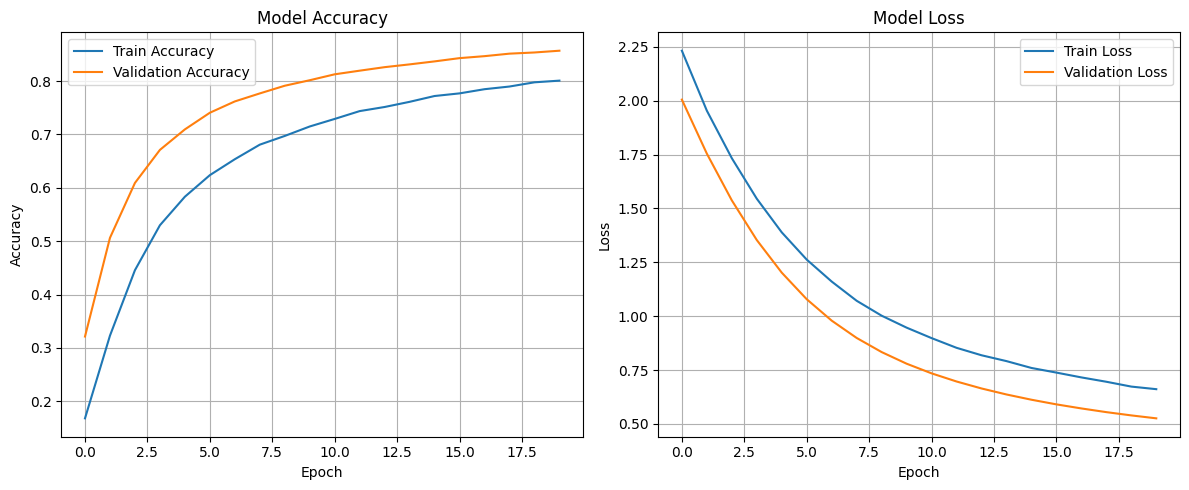

In [15]:
import matplotlib.pyplot as plt

# 1. 모델 학습 시 반환된 history 객체 저장
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

# 2. 정확도 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 3. 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()